In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

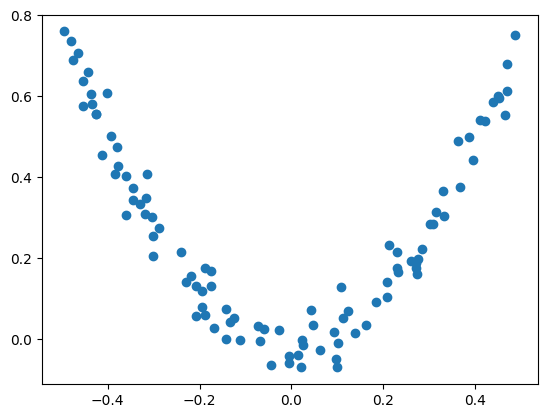

In [3]:
plt.scatter(X, y)

In [4]:
df = pd.DataFrame(X, columns=['X'])
df['y'] = y
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


In [6]:
# Step_1
df['pred_1'] = df['y'].mean()
df.head()

,X,y,pred_1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


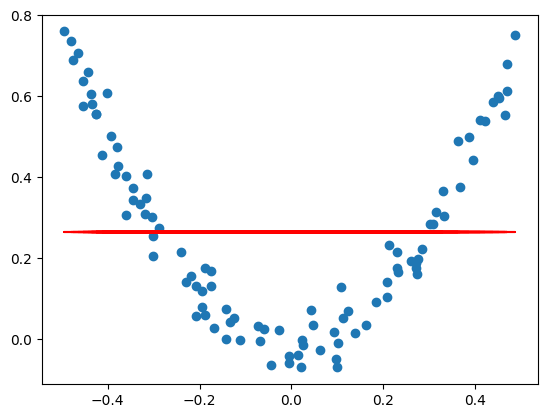

In [12]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred_1'], color='red')

In [7]:
df['res_1'] =  df['y']-df['pred_1']
df.head()

,X,y,pred_1,res_1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


In [25]:
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(max_leaf_nodes=8)
dt1.fit(df[['X']], df[['res_1']])

DecisionTreeRegressor(max_leaf_nodes=8)

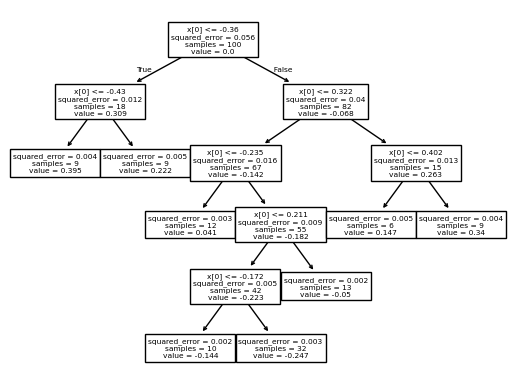

In [26]:
from sklearn.tree import plot_tree
plot_tree(dt1)
plt.show()

In [33]:
df['y_pred_2'] = df['pred_1'] + dt1.predict(df[['X']])
df.head()

,X,y,pred_1,res_1,y_pred_2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018320
4,-0.343981,0.343986,0.265458,0.078528,0.305965


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


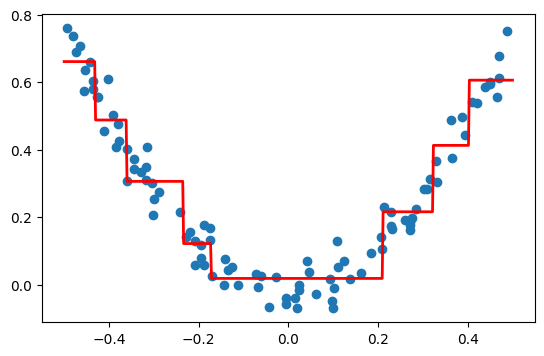

In [32]:
X_test = np.linspace(-0.5, 0.5, 500)
y_pred = 0.265458 + dt1.predict(X_test.reshape(500, 1))

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [36]:
df['res_2'] = df['y'] - df['y_pred_2']
df.head()

,X,y,pred_1,res_1,y_pred_2,res_2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021


In [37]:
dt2 = DecisionTreeRegressor(max_leaf_nodes=8)
dt2.fit(df[['X']],df[['res_2']])

DecisionTreeRegressor(max_leaf_nodes=8)

In [38]:
df['y_pred_3'] = df['y_pred_2'] + dt2.predict(df[['X']])
df.head()

,X,y,pred_1,res_1,y_pred_2,res_2,y_pred_3
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253,0.014321
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404,0.597523
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732,0.207423
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497,-0.019811
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021,0.301966


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'X vs y')

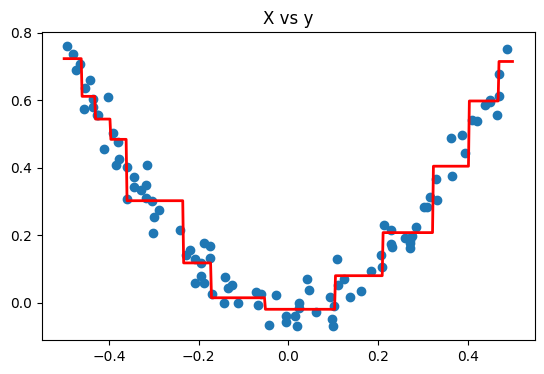

In [41]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [dt1,dt2])

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')
